<a href="https://colab.research.google.com/github/LucasMGcode/INF250/blob/main/2024_Trabalho1_Inf250__Maquina_de_Estados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 1 - Até 5 alunos - Entregar até 7/11/24

Nome e Matricula

1.Lucas de Oliveira Mota - ES108209

2.

3.

4.

5.


In [2]:
#@title Execute para fazer a Instalação
!pip install git+https://github.com/lesc-ufv/cad4u.git >& /dev/null
!git clone https://github.com/lesc-ufv/cad4u >& /dev/null
%load_ext plugin
!pip install svgwrite > /dev/null
!apt install yosys

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  berkeley-abc gir1.2-atk-1.0 gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-gtk-3.0
  gir1.2-harfbuzz-0.0 gir1.2-pango-1.0 libpangoxft-1.0-0 python3-cairo python3-gi-cairo
  python3-numpy xdot
Suggested packages:
  python-numpy-doc python3-pytest
The following NEW packages will be installed:
  berkeley-abc gir1.2-atk-1.0 gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-gtk-3.0
  gir1.2-harfbuzz-0.0 gir1.2-pango-1.0 libpangoxft-1.0-0 python3-cairo python3-gi-cairo
  python3-numpy xdot yosys
0 upgraded, 13 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.7 MB of archives.
After this operation, 40.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 berkeley-abc amd64 1.01+20211229git48498af+dfsg-2 [4,271 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 gir1.2-atk-1

# 1. Máquina de Estados com três estados

[video explicando as tarefas da parte I](https://youtu.be/P8eUWea26GM)

* **Problema**: Uma máquina com 2 entradas A e B e uma saida L, onde L irá piscar 0,1...se A mudar de 0 para 1
 e depois irá parar  de piscar quando mudar novamente de 0 para 1. Com relação a B, se a saida L
estiver Ligada, B=1 mudara o padrão de piscar para 0, 1, 1, 0, 1,1,....ou seja,
fica um clock em 0 e dois clocks em 1. Se B=0, piscará 0,1,0,1....alternando. O **problema** foi trabalho em aula mostrando várias versões com 4 ou mais estados no [Colab de questões de maquina de estados para prova](https://colab.research.google.com/drive/125SEOMvap7XiBO3YRf-L5n_XuvG6iZQD?usp=sharing)

* Fazer as três implementações em Verilog e montar no Wokwi a implementação com circuito.


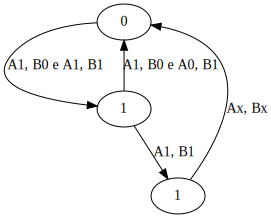

In [2]:
#@title 1.1 Diagrama de Estados Modificar para ter 3 estados apenas
from graphviz import Digraph
fsm = Digraph()
# Estados/Nós
fsm.node('off','0')
fsm.node('on 0','1')
fsm.node('on 1','1')

fsm.edge('off','on 0',"A1, B0 e A1, B1")
fsm.edge('on 0','off',"A1, B0 e A0, B1")
fsm.edge('on 0','on 1',"A1, B1")
fsm.edge('on 1','off',"Ax, Bx")

fsm

## Dicas

[consultar o colab de Sinal de Trânsito para seguir completar os itens abaixo](https://colab.research.google.com/drive/1QH_gkbgfoL2nmEw3e4PH8naGjNf2ATNd)

PS: O sinal de trânsito não tem entradas externas como A e B. Pode consultar o Colab com varios exemplos de [Triplas](https://colab.research.google.com/drive/1eNKWvlzjtjhqw3H3qWdobHE4gMVmZOZU?usp=sharing) para ver maquinas com entradas.

## 1.2 Completar a Tabela

Linha | E1 | E0 | Estado | A | B | P1 | P0 | Proximo | Saida Led | Código em Hexadecimal
---|---|---|----|---|---|---|---|----|---|------
01 | 0 | 0 | 00 | 0 | 0 | 0 | 0 | 00 | 0 | 0x01
02 | 0 | 0 | 00 | 0 | 1 | 0 | 0 | 00 | 0 | 0x02
03 | 0 | 0 | 00 | 1 | 0 | 0 | 1 | 01 | 0 | 0x03
04 | 0 | 0 | 00 | 1 | 1 | 0 | 1 | 01 | 0 | 0x04
05 | 0 | 1 | 01 | 0 | 0 | 0 | 0 | 00 | 1 | 0x05
06 | 0 | 1 | 01 | 0 | 1 | 0 | 0 | 00 | 1 | 0x06
07 | 0 | 1 | 01 | 1 | 0 | 0 | 0 | 00 | 1 | 0x07
08 | 0 | 1 | 01 | 1 | 1 | 1 | 0 | 10 | 1 | 0x08
09 | 1 | 0 | 10 | 0 | 0 | 0 | 0 | 00 | 1 | 0x09
10 | 1 | 0 | 10 | 0 | 1 | 0 | 0 | 00 | 1 | 0x0A
11 | 1 | 0 | 10 | 1 | 0 | 0 | 0 | 00 | 1 | 0x0B
12 | 1 | 0 | 10 | 1 | 1 | 0 | 0 | 00 | 1 | 0x0C



## 1.3 Equações

### Estados e seus códigos

* Estado 00: E0 = 0, E1 = 0
* Estado 01: E0 = 0, E1 = 1
* Estado 10: E0 = 1, E1 = 0

### Mapas de Karnaugh:

dica: [ferramenta online](https://www.charlie-coleman.com/experiments/kmap/)

P1:

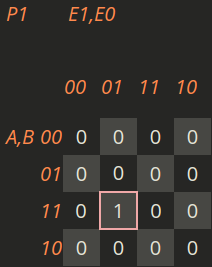

P0:

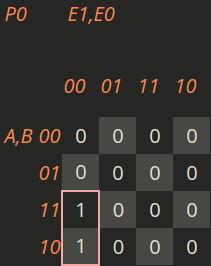

### Equações
Equações de próximo estado (P1 e P0):

* $P_1 = f(a,b,E_1,E_0)$
* $P_0 = f(a,b,E_1,E_0)$
* $Led   = f(a,b,E_1,E_0)$


Em verilog:

```
assign P1 = (A & B & ~E1 & E0);
assign P0 = (A & ~E1 & ~E0);
assign Led = E1 | E0;
```





Installing. Please wait... done!


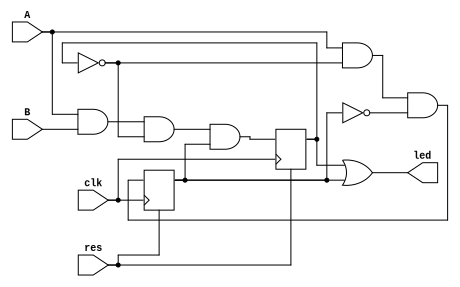

In [3]:
#@title 1.4 Código em Verilog com Portas Lógicas
%%print_verilog -n fsm_portas.v

module ff (
    input data,
    input c,
    input r,
    output reg q
);

  always @(posedge c or negedge r)
  begin
    if(r == 1'b0)
      q <= 1'b0;
    else
      q <= data;
    end
endmodule //End

module fsm(
    input clk,
    input res,
    input A,
    input B,
    output led
);

    wire E1, E0; // Bits do estado atual
    wire P1, P0; // Bits do próximo estado

    // Lógica do próximo estado
    assign P1 = (A & B & ~E1 & E0);
    assign P0 = (A & ~E1 & ~E0);

    // Lógica de saída
    assign led = E1 | E0;

    // Instanciação dos flip-flops
    ff _E0(
        .data(P0),
        .c(clk),
        .r(res),
        .q(E0)
    );

    ff _E1(
        .data(P1),
        .c(clk),
        .r(res),
        .q(E1)
    );

endmodule

In [4]:
%%writefile test.v
module main;
reg c,res,a,b;
wire led;

fsm FSM(c,res,a,b,led);

initial
    c = 1'b0;
  always
    c= #(1) ~c;

initial
    begin
     $dumpfile ("out.vcd");
     $dumpvars;
     $monitor($time," c %b res %b a %b b %b led %b",c,res,a,b,led);
      #1 res=0; a=0; b=0;
      #1 res=1;
      #2; a=1;
      #10; b=1;
      #14; b=0; a=0;
      #10;
      $finish ;
    end
endmodule

Writing test.v


In [5]:
#@title Simulação com o Testbench
%%verilog
`include "fsm_portas.v"
`include "test.v"


VCD info: dumpfile out.vcd opened for output.
                   0 c 0 res x a x b x led x
                   1 c 1 res 0 a 0 b 0 led 0
                   2 c 0 res 1 a 0 b 0 led 0
                   3 c 1 res 1 a 0 b 0 led 0
                   4 c 0 res 1 a 1 b 0 led 0
                   5 c 1 res 1 a 1 b 0 led 1
                   6 c 0 res 1 a 1 b 0 led 1
                   7 c 1 res 1 a 1 b 0 led 0
                   8 c 0 res 1 a 1 b 0 led 0
                   9 c 1 res 1 a 1 b 0 led 1
                  10 c 0 res 1 a 1 b 0 led 1
                  11 c 1 res 1 a 1 b 0 led 0
                  12 c 0 res 1 a 1 b 0 led 0
                  13 c 1 res 1 a 1 b 0 led 1
                  14 c 0 res 1 a 1 b 1 led 1
                  15 c 1 res 1 a 1 b 1 led 1
                  16 c 0 res 1 a 1 b 1 led 1
                  17 c 1 res 1 a 1 b 1 led 0
                  18 c 0 res 1 a 1 b 1 led 0
                  19 c 1 res 1 a 1 b 1 led 1
                  20 c 0 res 1 a 1 b 1 led 1
         

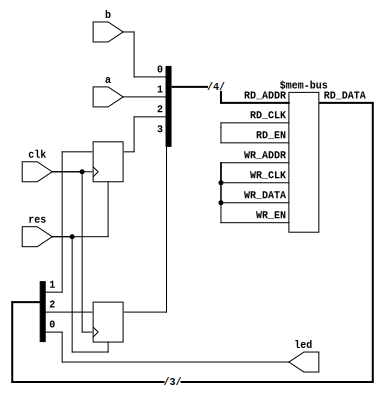

In [6]:
#@title 1.5 Código em Verilog com Memoria
%%print_verilog -n fsm_memoria.v

module ff (
    input data,
    input c,
    input r,
    output reg q
);
  always @(posedge c or negedge r)
  begin
    if (r == 1'b0)
      q <= 1'b0;
    else
      q <= data;
  end
endmodule //End

/*
       d    +-------+
     +----->|       |
         e  |address|out  (2 bits)
        +-->|       +----+
        |   |       |    |
        |   +-------+    |
        |                |
        |      +---+     |
        +------+   |+----+
          e    |st0| pe
               +---+
*/

module fsm(
    input clk,
    input res,
    input a, // Entrada A
    input b, // Entrada B
    output led // Saída LED
);

    // Memória para armazenar a tabela de transição
    reg [2:0] StateMachine [0:15];
    initial begin
        // Estado 00, A=0, B=0 -> Próximo estado 00, LED=0
        StateMachine[4'b0000] = 3'b000;
        StateMachine[4'b0001] = 3'b000;

        // Estado 00, A=1, B=0 -> Próximo estado 01, LED=0
        StateMachine[4'b0010] = 3'b010;
        StateMachine[4'b0011] = 3'b010;

        // Estado 01, A=0, B=0 -> Próximo estado 00, LED=1
        StateMachine[4'b0100] = 3'b001;
        StateMachine[4'b0101] = 3'b001;
        StateMachine[4'b0110] = 3'b001;

        // Estado 01, A=1, B=1 -> Próximo estado 10, LED=1
        StateMachine[4'b0111] = 3'b101;

        // Estado 10, A=0, B=0 -> Próximo estado 00, LED=1
        StateMachine[4'b1000] = 3'b001;
        StateMachine[4'b1001] = 3'b001;
        StateMachine[4'b1010] = 3'b001;
        StateMachine[4'b1011] = 3'b001;
    end


    wire [3:0] address; // Endereço para a memória de estado
    wire [2:0] dout;    // Saída da memória (próximo estado + LED)
    wire [1:0] state;   // Estado atual (2 bits)

    // Construção do endereço: Estado atual + entradas
    assign address = {state, a, b};
    assign dout = StateMachine[address];

    // Separar próximo estado e saída LED
    wire [1:0] next_state = dout[2:1];
    assign led = dout[0];

    // Flip-flops para armazenar o estado atual
    ff st0(
        .data(next_state[0]),
        .c(clk),
        .r(res),
        .q(state[0])
    );

    ff st1(
        .data(next_state[1]),
        .c(clk),
        .r(res),
        .q(state[1])
    );

endmodule


In [7]:
#@title Simulação com o Testbench
%%verilog
`include "fsm_memoria.v"
`include "test.v"


VCD info: dumpfile out.vcd opened for output.
                   0 c 0 res x a x b x led x
                   1 c 1 res 0 a 0 b 0 led 0
                   2 c 0 res 1 a 0 b 0 led 0
                   3 c 1 res 1 a 0 b 0 led 0
                   4 c 0 res 1 a 1 b 0 led 0
                   5 c 1 res 1 a 1 b 0 led 1
                   6 c 0 res 1 a 1 b 0 led 1
                   7 c 1 res 1 a 1 b 0 led 0
                   8 c 0 res 1 a 1 b 0 led 0
                   9 c 1 res 1 a 1 b 0 led 1
                  10 c 0 res 1 a 1 b 0 led 1
                  11 c 1 res 1 a 1 b 0 led 0
                  12 c 0 res 1 a 1 b 0 led 0
                  13 c 1 res 1 a 1 b 0 led 1
                  14 c 0 res 1 a 1 b 1 led 1
                  15 c 1 res 1 a 1 b 1 led 1
                  16 c 0 res 1 a 1 b 1 led 1
                  17 c 1 res 1 a 1 b 1 led 0
                  18 c 0 res 1 a 1 b 1 led 0
                  19 c 1 res 1 a 1 b 1 led 1
                  20 c 0 res 1 a 1 b 1 led 1
         

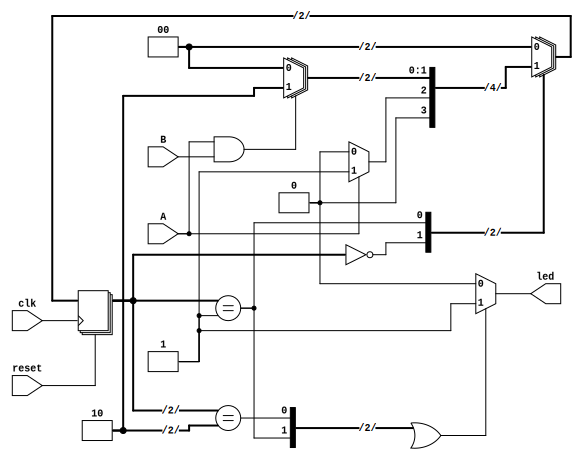

In [8]:
#@title 1.6. Código em Verilog comportamental
%%print_verilog -n fsm_behavior.v

module fsm(
    input clk,
    input reset,
    input A,
    input B,
    output reg led
);

    // Definição dos estados
    reg [1:0] state;
    reg [1:0] next_state;

    // Codificação dos estados
    parameter S0 = 2'b00; // Estado 00
    parameter S1 = 2'b01; // Estado 01
    parameter S2 = 2'b10; // Estado 10

    // Transição de estado
    always @(posedge clk or negedge reset)
    begin
        if (!reset)
            state <= S0; // Estado inicial
        else
            state <= next_state;
    end

    // Lógica do próximo estado e saída
    always @(*)
    begin
        case (state)
            S0: // Estado 00
            begin
                led = 1'b0; // Saída LED = 0
                if (A == 1'b1)
                    next_state = S1; // Transição para Estado 01
                else
                    next_state = S0; // Permanece no Estado 00
            end

            S1: // Estado 01
            begin
                led = 1'b1; // Saída LED = 1
                if (A == 1'b1 && B == 1'b1)
                    next_state = S2; // Transição para Estado 10
                else
                    next_state = S0; // Retorna para Estado 00
            end

            S2: // Estado 10
            begin
                led = 1'b1; // Saída LED = 1
                next_state = S0; // Retorna para Estado 00
            end

            default:
            begin
                led = 1'b0;
                next_state = S0;
            end
        endcase
    end

endmodule


In [9]:
#@title Simulação com o Testbench
%%verilog
`include "fsm_behavior.v"
`include "test.v"


VCD info: dumpfile out.vcd opened for output.
                   0 c 0 res x a x b x led x
                   1 c 1 res 0 a 0 b 0 led 0
                   2 c 0 res 1 a 0 b 0 led 0
                   3 c 1 res 1 a 0 b 0 led 0
                   4 c 0 res 1 a 1 b 0 led 0
                   5 c 1 res 1 a 1 b 0 led 1
                   6 c 0 res 1 a 1 b 0 led 1
                   7 c 1 res 1 a 1 b 0 led 0
                   8 c 0 res 1 a 1 b 0 led 0
                   9 c 1 res 1 a 1 b 0 led 1
                  10 c 0 res 1 a 1 b 0 led 1
                  11 c 1 res 1 a 1 b 0 led 0
                  12 c 0 res 1 a 1 b 0 led 0
                  13 c 1 res 1 a 1 b 0 led 1
                  14 c 0 res 1 a 1 b 1 led 1
                  15 c 1 res 1 a 1 b 1 led 1
                  16 c 0 res 1 a 1 b 1 led 1
                  17 c 1 res 1 a 1 b 1 led 0
                  18 c 0 res 1 a 1 b 1 led 0
                  19 c 1 res 1 a 1 b 1 led 1
                  20 c 0 res 1 a 1 b 1 led 1
         

## 1.7 Fazer com Wokwi

[exemplo do sinal](https://wokwi.com/projects/374163756027780097)

Terá das chaves A e B, o Arduino para Clock e o botão de Reset, 2 flipflops e algumas portas lógicas.

[Colocar sua solução aqui]():

#[Link minha versão](https://wokwi.com/projects/414655615193933825)

#diagram.json:
{
  "version": 1,
  "author": "Lucas",
  "editor": "wokwi",
  "parts": [
    {
      "type": "wokwi-led",
      "id": "led3",
      "top": -234,
      "left": 964.2,
      "attrs": { "color": "red", "flip": "1" }
    },
    { "type": "wokwi-gnd", "id": "gnd1", "top": 192, "left": 978.6, "attrs": {} },
    {
      "type": "wokwi-pushbutton",
      "id": "btn1",
      "top": 102.2,
      "left": -268.8,
      "attrs": { "color": "green" }
    },
    {
      "type": "wokwi-resistor",
      "id": "r4",
      "top": 176.75,
      "left": 163.2,
      "attrs": { "value": "1000" }
    },
    { "type": "wokwi-vcc", "id": "vcc1", "top": 87.16, "left": -307.2, "attrs": {} },
    { "type": "wokwi-flip-flop-dsr", "id": "flop2", "top": -107.38, "left": -115.24, "attrs": {} },
    { "type": "wokwi-flip-flop-dsr", "id": "flop1", "top": -12.3, "left": -119.6, "attrs": {} },
    { "type": "wokwi-gnd", "id": "gnd2", "top": -134.4, "left": -39, "attrs": {} },
    { "type": "wokwi-gnd", "id": "gnd3", "top": -40.26, "left": -38.23, "attrs": {} },
    { "type": "wokwi-arduino-uno", "id": "uno", "top": 749.4, "left": -327, "attrs": {} },
    { "type": "wokwi-slide-switch", "id": "sw1", "top": -254.8, "left": -688.1, "attrs": {} },
    { "type": "wokwi-slide-switch", "id": "sw2", "top": 186.8, "left": -1196.9, "attrs": {} },
    { "type": "wokwi-vcc", "id": "vcc2", "top": -296.84, "left": -729.6, "attrs": {} },
    { "type": "wokwi-vcc", "id": "vcc3", "top": 144.76, "left": -1228.8, "attrs": {} },
    { "type": "wokwi-gnd", "id": "gnd4", "top": -220.8, "left": -643.8, "attrs": {} },
    { "type": "wokwi-gnd", "id": "gnd5", "top": 259.2, "left": -1133.4, "attrs": {} },
    { "type": "wokwi-gate-or-2", "id": "or3", "top": -211.2, "left": 816, "attrs": {} },
    { "type": "wokwi-gate-and-2", "id": "and1", "top": 259.2, "left": -758.4, "attrs": {} },
    { "type": "wokwi-gate-and-2", "id": "and2", "top": 249.6, "left": -960, "attrs": {} },
    { "type": "wokwi-gate-and-2", "id": "and3", "top": 268.8, "left": -576, "attrs": {} },
    { "type": "wokwi-gate-and-2", "id": "and4", "top": -172.8, "left": -278.4, "attrs": {} },
    { "type": "wokwi-gate-and-2", "id": "and5", "top": -182.4, "left": -403.2, "attrs": {} },
    { "type": "wokwi-gate-not", "id": "not1", "top": 172.8, "left": -864, "attrs": {} },
    { "type": "wokwi-gate-not", "id": "not2", "top": -134.4, "left": -403.2, "attrs": {} }
  ],
  "connections": [
    [ "r4:2", "gnd1:GND", "black", [ "h670.8", "v0", "h96" ] ],
    [ "vcc1:VCC", "btn1:1.l", "red", [ "v0" ] ],
    [ "gnd2:GND", "flop2:S", "black", [ "v4.6", "h-43.56" ] ],
    [ "gnd3:GND", "flop1:S", "black", [ "v7.97", "h-34.2" ] ],
    [ "r4:1", "btn1:2.l", "green", [ "h-460.8", "v-48.2" ] ],
    [ "flop1:R", "btn1:2.l", "green", [ "h-1.6", "v40.15", "h-42", "v77.75", "h-172.8", "v-29" ] ],
    [ "vcc2:VCC", "sw1:1", "red", [ "v57.6", "h38.4" ] ],
    [ "vcc3:VCC", "sw2:1", "red", [ "v48", "h38.4" ] ],
    [ "gnd5:GND", "sw2:3", "black", [ "h-28.8", "v0", "h-19.4" ] ],
    [ "gnd4:GND", "sw1:3", "black", [ "h-19.2", "v-9.6" ] ],
    [ "led3:A", "or3:OUT", "green", [ "v0" ] ],
    [ "led3:C", "gnd1:GND", "green", [ "v345.6", "h-125.2" ] ],
    [ "flop2:Q", "or3:A", "orange", [ "v1.78", "h739.24", "v-115.2" ] ],
    [ "flop1:Q", "or3:B", "orange", [ "v2.7", "h830" ] ],
    [ "sw1:2", "and5:A", "green", [ "v0" ] ],
    [ "flop2:Q", "not1:IN", "green", [ "h57.64", "v-257.42", "h-902.4" ] ],
    [ "sw2:2", "and2:B", "green", [ "v0" ] ],
    [ "and2:OUT", "and1:A", "green", [ "v0" ] ],
    [ "and1:OUT", "and3:A", "green", [ "v0" ] ],
    [ "and3:OUT", "flop2:D", "green", [ "v0" ] ],
    [ "sw1:2", "and2:A", "green", [ "v48", "h-124.7" ] ],
    [ "not1:OUT", "and1:B", "green", [ "v96", "h9.6" ] ],
    [ "not1:OUT", "and5:B", "green", [ "v-345.6", "h374.4" ] ],
    [ "and5:OUT", "and4:A", "green", [ "v0" ] ],
    [ "flop1:Q", "and3:B", "green", [ "v2.7", "h33.2", "v359.4", "h-585.6" ] ],
    [ "flop1:Q", "not2:IN", "green", [ "v2.7", "h100.4", "v-230.4", "h-480" ] ],
    [ "not2:OUT", "and4:B", "green", [ "v0", "h115.2" ] ],
    [ "and4:OUT", "flop1:D", "green", [ "v0" ] ],
    [ "btn1:2.l", "flop2:R", "green", [ "h-19.2", "v29", "h172.8", "v-76.8", "h0", "v-134.4" ] ],
    [ "uno:13", "flop1:CLK", "green", [ "v0" ] ],
    [ "uno:13", "flop2:CLK", "green", [ "v0" ] ]
  ],
  "dependencies": {}
}



# 2. Elevador

* Objetivo: Codificar tabelas maiores e máquina com auxilio do software ABC para minimizar e do Chatgpt para visualizar o funcionamento.

* Dica: [consultar o Colab do Elevador](https://colab.research.google.com/drive/1eNKWvlzjtjhqw3H3qWdobHE4gMVmZOZU?usp=sharing)


## 2.1 Simulador com Código Comportamental

[video com explicações parte I](https://youtu.be/z0JKDssfFXk)

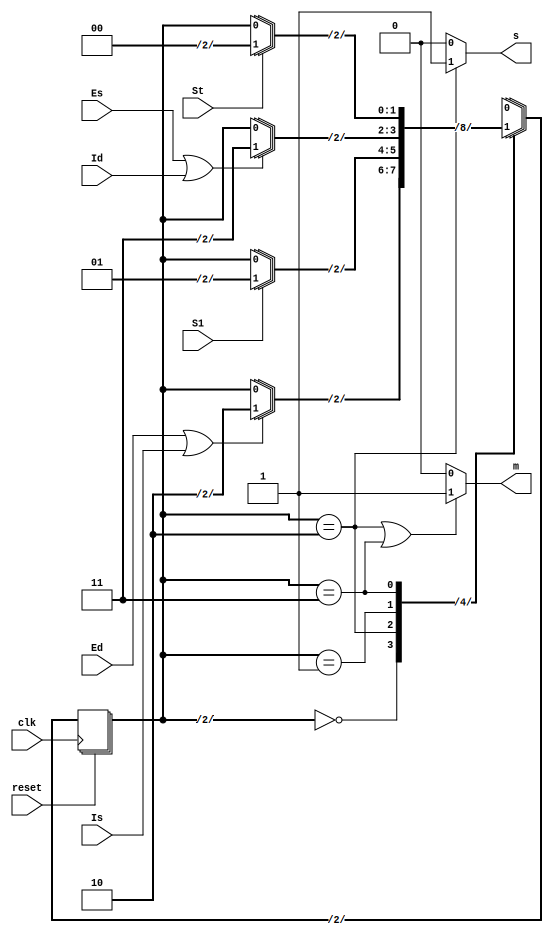

In [17]:
#@title Elevador Comportamento
%%print_verilog -n elevador.v
module elevador(input clk, reset, Es,Ed,Is,Id,St,S1,
output m,s);
reg [1:0] state;
parameter terreo=2'd0, one=2'd1, sobe=2'd2, desce=2'd3	 ;

assign m = (state == sobe || state == desce)? 1:0;
assign s = (state == sobe)? 1:0;

always @(posedge clk or negedge reset)
     begin
          if (reset==0)
               state = terreo;
          else
               case (state)
                terreo: if ( Ed==1 | Is==1 ) state = sobe;
                sobe: if ( S1 == 1) state = one;
                one: if ( Es==1 | Id ==1 ) state = desce;
                desce: if ( St ==1) state = terreo;
               endcase
     end
endmodule

In [18]:
#@title Simulação Elevador

head = """
`include "elevador.v"
module tb();
reg clk;
reg rst;
reg Es, Ed, Is, Id, St, S1;
wire m, s;

elevador E (clk, rst, Es, Ed, Is, Id, St, S1, m, s);

initial begin
    $dumpfile("test.vcd");
    $dumpvars;
"""

tail = """
    if (E.state == E.terreo) begin
        $display("[ Terreo ]");
    end
    if (E.state == E.sobe) begin
        $display("  [ Subindo /\ ]");
    end
    if (E.state == E.one) begin
        $display("[ 1 Andar ]");
    end
    if (E.state == E.desce) begin
        $display("[ Descendo \\/ ]");
    end
    $dumpoff;
    $finish;
end
endmodule
"""

# Importações necessárias
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact
import subprocess
import sys
import matplotlib.pyplot as plt

# Função para exibir a simulação do waveform
def waveform(filename, sign_list, time_begin, time_end, base):
    sys.path.insert(0, '.')
    from cad4u.hdl.vcd_parser.vcd_plotter import VcdPlotter
    op_dict = [{'0': "Terreo", '1': "Primeiro", '10': "Sobe", '11': "Desce"}]
    vcd_plt = VcdPlotter(f'/content/{filename}')
    plt.figure()
    vcd_plt.return_show(op_dict, sign_list, time_begin, time_end, base)
    plt.show()

    # Substitui a saída gráfica anterior
    display(widgets.Output())

# Lista de comandos gerados
L = []

# Função para gerar o código Verilog
def geraverilog(rst, clk, cls, Es, Ed, Is, Id, St, S1):
    global L

    if cls:
        L = []  # Limpa a lista se 'clean' for selecionado
    plt.close()
    clear_output()  # Limpa a saída anterior

    # Criação do arquivo Verilog para simulação
    with open("test_comp.v", "w") as f:
        f.write(head)
        to_string = lambda value: "1" if value else "0"
        s = f"rst = {to_string(rst)}; clk = {to_string(clk)};\n"
        s += f"Es = {to_string(Es)}; Ed = {to_string(Ed)}; Is = {to_string(Is)}; Id = {to_string(Id)};\n"
        s += f"St = {to_string(St)}; S1 = {to_string(S1)}; #1\n"
        L.append(s)
        for i in L:
            f.write(i)
        f.write(tail)

    # Comandos de simulação
    command = "iverilog test_comp.v"
    output = subprocess.check_output(command, shell=True)
    command = "./a.out"
    output = subprocess.check_output(command, shell=True)
    output_lines = output.decode('utf-8').split('\n')

    # Salvar a saída em um arquivo
    with open("saida.txt", "a") as saida:
        for line in output_lines:
            print(line)
            saida.write(line + "\n")

    # Configuração do waveform
    sign_list = ['tb.clk', 'tb.rst', 'tb.E.state,r[0]', 'tb.m', 'tb.s']
    time_begin = 0
    time_end = len(L)
    base = 'bin'  # Formato: binário, decimal, hexadecimal, etc.
    waveform("test.vcd", sign_list, time_begin, time_end, base)

# Criação dos widgets
rst = widgets.Checkbox(description='Reset', value=False)
clk = widgets.Checkbox(description='Clock', value=False)
cls = widgets.Checkbox(description='Clean', value=False)
Es = widgets.Checkbox(description='Externo Sobe', value=False)
Ed = widgets.Checkbox(description='Externo Desce', value=False)
Is = widgets.Checkbox(description='Interno Sobe', value=False)
Id = widgets.Checkbox(description='Interno Desce', value=False)

# Sensores
St = widgets.Checkbox(description='Sensor Térreo', value=False)
S1 = widgets.Checkbox(description='Sensor 1° Andar', value=False)

# Vinculação dos widgets à função de simulação
saida = open("saida.txt", "w")
interact(
    geraverilog,
    clk=clk,
    rst=rst,
    cls=cls,
    Es=Es,
    Ed=Ed,
    Is=Is,
    Id=Id,
    St=St,
    S1=S1
)


interactive(children=(Checkbox(value=False, description='Reset'), Checkbox(value=False, description='Clock'), …

<function __main__.geraverilog(rst, clk, cls, Es, Ed, Is, Id, St, S1)>

### Link de uma animação inicial

[no final do colab](https://colab.research.google.com/drive/1HdkdcTuEzt1xin81SQcvn2bIEK7grjsn) tem uma animação, a ideia é melhorar a animação e acoplar a execução.


## 2.2 Tabela em Memória

[video com explicações - parte II](https://youtu.be/U07_vtD7vFA)

* Entradas: 4 botões, 2 Sensores (6 bits)
* Saídas: Motor e Sentido (2 bits)
* Estados: 4 estados, 2 bits

* Largura da Tabela = Estados+Saída = 4 bits
* Comprimento da Tabela = $2^{Entradas+Estados}= 2^{6+2}= 256$

* Terreo = 00

Linha | Estado | ES | ED | IS | ID | ST | S1 | Proximo | Saidas
--|--|--|--|--|--|--|--|--|--
? | 00 | x | 0 | 0 | x | x | x | 00 | 0 x

Você pode preencher as linhas por grupos, pois tem sinais que não são observados em um certo estado.

Quais as linhas a situação acima ilustra ?

* **resposta**: 00x00xxx, Se ES=0, temos as linhas de 0 a 7, em binário 00000$\boxed{000}$ a 00000$\boxed{111}$. Se ES=1,  temos as linhas de 32 a 39, em binário 00100$\boxed{000}$ a 00100$\boxed{111}$. Ou seja, teremos 16 linhas com o valor 0000, próximo estado igual a 0, motor desligado e sentido tanto faz podemos assumir 0.


Vocês podem fazer manualmente ou escrever um código para gerar as linhas do Verilog, pois serão 256 linhas....



In [ ]:
#@title Complete, irá sobreescrever o elevador comportamental e poderá simular com teste acima ou seu simulador
%%print_verilog -n elevador.v

module ff ( input data, input c, input r, output q);
reg q;
always @(posedge c or negedge r)
begin
 if(r==1'b0)
  q <= 1'b0;
 else
  q <= data;
end
endmodule //End

module elevador(input clk, reset, Es,Ed,Is,Id,St,S1,
output m,s);
parameter terreo=2'd0, one=2'd1, sobe=2'd2, desce=2'd3;
reg [3:0] StateMachine [0:255];
initial
begin  // programar aqui...
StateMachine[0] = 4'd0;
end
wire [7:0] address;
wire [3:0] dout;
wire [1:0] state;

assign state = address[...];
assign address[...] = {Es,Ed,Is,Id,St,S1};
assign dout = StateMachine[address];
assign m = dout[...];
assign s = dout[...];
ff st0(dout[...],clk,res,address[...]);
ff st1(dout[...],clk,res,address[...]);
endmodule


## 2.3 Circuito com Portas Lógicas

[video com explicações parte III](https://youtu.be/ITIHfR-hPd4)


* Iremos usar o ABC para simplificar pois a tabela ficará muito grande para fazer com mapa.
* Podemos usar a tabela do 2.1, mas tem a vantagem de poder usar os "x", logo será um numero menor de linhas para escrever....


In [ ]:
#@title Fazendo o Download e montando ABC
!wget https://github.com/arduinoufv/abc/blob/main/xaa?raw=true &> /dev/null
!wget https://github.com/arduinoufv/abc/blob/main/xab?raw=true &> /dev/null
!wget https://github.com/arduinoufv/abc/blob/main/xac?raw=true &> /dev/null
!wget https://github.com/arduinoufv/abc/blob/main/xad?raw=true &> /dev/null
!wget https://github.com/arduinoufv/abc/blob/main/xae?raw=true &> /dev/null
!wget https://github.com/arduinoufv/abc/blob/main/xaf?raw=true &> /dev/null
!wget https://github.com/arduinoufv/abc/blob/main/xag?raw=true &> /dev/null
!wget https://github.com/arduinoufv/abc/blob/main/xah?raw=true &> /dev/null
!cat xaa?raw=true xab?raw=true xac?raw=true xad?raw=true xae?raw=true xaf?raw=true xag?raw=true xah?raw=true > abc
!chmod a+x abc
!rm  *raw=true

In [ ]:
#@title Script e Alias dos Comandos
%%writefile abc.rc
# global parameters
set check         # checks intermediate networks
#set checkfio      # prints warnings when fanins/fanouts are duplicated
#unset checkread   # does not check new networks after reading from file
#set backup        # saves backup networks retrived by "undo" and "recall"
#set savesteps 1   # sets the maximum number of backup networks to save
#set progressbar   # display the progress bar

# program names for internal calls
set dotwin dot.exe
set dotunix dot
set gsviewwin gsview32.exe
set gsviewunix gv
set siswin sis.exe
set sisunix sis
set mvsiswin mvsis.exe
set mvsisunix mvsis
set capowin MetaPl-Capo10.1-Win32.exe
set capounix MetaPl-Capo10.1
set gnuplotwin wgnuplot.exe
set gnuplotunix gnuplot

# Niklas Een's commands
#load_plugin C:\_projects\abc\lib\bip_win.exe "BIP"

# standard aliases
alias hi history
alias b balance
alias cg clockgate
alias cl cleanup
alias clp collapse
alias cs care_set
alias el eliminate
alias esd ext_seq_dcs
alias f fraig
alias fs fraig_sweep
alias fsto fraig_store
alias fres fraig_restore
alias fr fretime
alias ft fraig_trust
alias ic indcut
alias lp lutpack
alias pcon print_cone
alias pd print_dsd
alias pex print_exdc -d
alias pf print_factor
alias pfan print_fanio
alias pg print_gates
alias pl print_level
alias plat print_latch
alias pio print_io
alias pk print_kmap
alias pm print_miter
alias ps print_stats
alias psb print_stats -b
alias psu print_supp
alias psy print_symm
alias pun print_unate
alias q quit
alias r read
alias ra read_aiger
alias r3 retime -M 3
alias r3f retime -M 3 -f
alias r3b retime -M 3 -b
alias ren renode
alias rh read_hie
alias ri read_init
alias rl read_blif
alias rb read_bench
alias ret retime
alias dret dretime
alias rp read_pla
alias rt read_truth
alias rv read_verilog
alias rvl read_verlib
alias rsup read_super mcnc5_old.super
alias rlib read_library
alias rlibc read_library cadence.genlib
alias rty read_liberty
alias rlut read_lut
alias rw rewrite
alias rwz rewrite -z
alias rf refactor
alias rfz refactor -z
alias re restructure
alias rez restructure -z
alias rs resub
alias rsz resub -z
alias sa set autoexec ps
alias scl scleanup
alias sif if -s
alias so source -x
alias st strash
alias sw sweep
alias ssw ssweep
alias tr0 trace_start
alias tr1 trace_check
alias trt "r c.blif; st; tr0; b; tr1"
alias u undo
alias w write
alias wa write_aiger
alias wb write_bench
alias wc write_cnf
alias wh write_hie
alias wl write_blif
alias wp write_pla
alias wv write_verilog

# standard scripts
alias resyn       "b; rw; rwz; b; rwz; b"
alias resyn2      "b; rw; rf; b; rw; rwz; b; rfz; rwz; b"
alias resyn2a     "b; rw; b; rw; rwz; b; rwz; b"
alias resyn3      "b; rs; rs -K 6; b; rsz; rsz -K 6; b; rsz -K 5; b"
alias compress    "b -l; rw -l; rwz -l; b -l; rwz -l; b -l"
alias compress2   "b -l; rw -l; rf -l; b -l; rw -l; rwz -l; b -l; rfz -l; rwz -l; b -l"
alias choice      "fraig_store; resyn; fraig_store; resyn2; fraig_store; fraig_restore"
alias choice2     "fraig_store; balance; fraig_store; resyn; fraig_store; resyn2; fraig_store; resyn2; fraig_store; fraig_restore"
alias rwsat       "st; rw -l; b -l; rw -l; rf -l"
alias drwsat2     "st; drw; b -l; drw; drf; ifraig -C 20; drw; b -l; drw; drf"
alias share       "st; multi -m; sop; fx; resyn2"
alias addinit     "read_init; undc; strash; zero"
alias blif2aig    "undc; strash; zero"
alias v2p         "&vta_gla; &ps; &gla_derive; &put; w 1.aig; pdr -v"
alias g2p         "&ps; &gla_derive; &put; w 2.aig; pdr -v"
alias &sw_        "&put; sweep; st; &get"
alias &fx_        "&put; sweep; sop; fx; st; &get"
alias &dc3        "&b; &jf -K 6; &b; &jf -K 4; &b"
alias &dc4        "&b; &jf -K 7; &fx; &b; &jf -K 5; &fx; &b"

# resubstitution scripts for the IWLS paper
alias src_rw      "st; rw -l; rwz -l; rwz -l"
alias src_rs      "st; rs -K 6 -N 2 -l; rs -K 9 -N 2 -l; rs -K 12 -N 2 -l"
alias src_rws     "st; rw -l; rs -K 6 -N 2 -l; rwz -l; rs -K 9 -N 2 -l; rwz -l; rs -K 12 -N 2 -l"
alias resyn2rs    "b; rs -K 6; rw; rs -K 6 -N 2; rf; rs -K 8; b; rs -K 8 -N 2; rw; rs -K 10; rwz; rs -K 10 -N 2; b; rs -K 12; rfz; rs -K 12 -N 2; rwz; b"
alias r2rs        "b; rs -K 6; rw; rs -K 6 -N 2; rf; rs -K 8; b; rs -K 8 -N 2; rw; rs -K 10; rwz; rs -K 10 -N 2; b; rs -K 12; rfz; rs -K 12 -N 2; rwz; b"
alias compress2rs "b -l; rs -K 6 -l; rw -l; rs -K 6 -N 2 -l; rf -l; rs -K 8 -l; b -l; rs -K 8 -N 2 -l; rw -l; rs -K 10 -l; rwz -l; rs -K 10 -N 2 -l; b -l; rs -K 12 -l; rfz -l; rs -K 12 -N 2 -l; rwz -l; b -l"
alias c2rs        "b -l; rs -K 6 -l; rw -l; rs -K 6 -N 2 -l; rf -l; rs -K 8 -l; b -l; rs -K 8 -N 2 -l; rw -l; rs -K 10 -l; rwz -l; rs -K 10 -N 2 -l; b -l; rs -K 12 -l; rfz -l; rs -K 12 -N 2 -l; rwz -l; b -l"

# use this script to convert 1-valued and DC-valued flops for an AIG
alias fix_aig     "logic; undc; strash; zero"

# use this script to convert 1-valued and DC-valued flops for a logic network coming from BLIF
alias fix_blif    "undc; strash; zero"

# lazy man's synthesis
alias recadd3     "st; rec_add3; b; rec_add3; dc2; rec_add3; if -K 8; bidec; st; rec_add3; dc2; rec_add3; if -g -K 6; st; rec_add3"




Writing abc.rc


### Dicas

[desenho no Excalidraw com o arquivo PLA parcial](https://excalidraw.com/#json=bvsPn0KVV4BtUxZCF8OGT,gXrb4ysFttm7muXmESNllw)

In [ ]:
#@title Tabela para completar fiz só a linha Terreo com Ed=Is=0
%%writefile fsm.pla
.i 8
.o 4
00-00---  0000
00-01---  0111
00-10---  0111
00-11---  0111
.e


Writing fsm.pla


In [ ]:
#@title Script ABC para ler, otimizar e gerar o Verilog
%%writefile myscript.rc
rp fsm.pla; ps; resyn2; ps;resyn; ps; resyn2; ps;   write_verilog fsm.v;

Writing myscript.rc


In [ ]:
#@title Executando o ABC
!cat abc.rc myscript.rc > script.rc
!./abc -f script.rc

ABC command line: "source script.rc".

fsm                           : i/o =    8/    4  lat =    0  nd =     4  edge =     24  cube =     6  lev = 1
fsm                           : i/o =    8/    4  lat =    0  and =      3  lev =  2
fsm                           : i/o =    8/    4  lat =    0  and =      3  lev =  2
fsm                           : i/o =    8/    4  lat =    0  and =      3  lev =  2


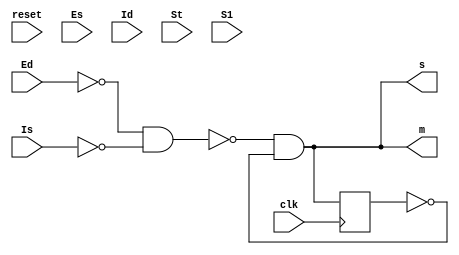

In [ ]:
#@title Se estiver correta a tabela, depois é só gerar o elevador aqui
%%print_verilog -n elevador.v
`include "fsm.v"

module ff ( input data, input c, input r, output q);
reg q;
always @(posedge c or negedge r)
begin
 if(r==1'b0)
  q <= 1'b0;
 else
  q <= data;
end
endmodule //End

module elevador(input clk, reset, Es,Ed,Is,Id,St,S1,
output m,s);
wire [1:0] e;
wire [1:0] p;
wire [1:0] state;
parameter terreo=2'd0, one=2'd1, sobe=2'd2, desce=2'd3;
assign state = e;
fsm abc( e[1], e[0], Es, Ed, Is, Id, St, S1,
    p[1], p[0], m, s  );
ff  e0(p[0],clk,res,e[0]);
ff  e1(p[1],clk,res,e[1]);
endmodule


# 3. Máquina de Vendas